In [1]:
#Cargamos las librerías necesarias para el análisis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import time 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import hilbert

In [2]:
df_hc = pd.read_excel('Database__writng_ML.xlsx','HC')
del df_hc['n'] # eliminamos la numeración
del df_hc['Suj']# delete the subject ID
df_hc

FIRMA  ESPAÑOL  POLACO  GRIEGO   FIRMA.1  ESPAÑOL.1  POLACO.1  GRIEGO.1  \
0    25.4     16.4    17.1    19.6  0.108883   0.121874  0.118214  0.120272   
1    22.2     16.0    15.9    17.4  0.095805   0.085368  0.089510  0.097469   
2     5.4     19.0    18.2    19.9  0.096043   0.095185  0.095094  0.093584   
3    42.7     14.7    15.2    15.6  0.089720   0.092022  0.087143  0.090333   
4    24.7     16.2    16.3    19.2  0.084755   0.086007  0.082206  0.086733   
5    16.2     20.8    19.0    17.1  0.081922   0.088233  0.080630  0.087637   
6    18.0     16.0    15.7    16.0  0.089825   0.088133  0.079560  0.078089   
7    39.2     15.0    14.0    16.1  0.086789   0.086023  0.089615  0.097128   
8    16.8     17.1    16.7    19.2  0.095978   0.093610  0.095581  0.103633   
9    38.6     12.6    12.7    17.5  0.070617   0.076512  0.074996  0.079944   
10    6.1     17.1    18.3    19.7  0.106351   0.123024  0.112275  0.109799   
11   13.6     15.4    16.9    18.9  0.089300   0.079573  0.077262  0.076618   
12   10.9     15.5    16.8    18.6  0.098897   0.084187  0.089715  0.096764   
13   17.9     17.8    17.9    20.0  0.085201   0.089101  0.083969  0.087379   
14   21.3     16.9    17.0    19.8  0.094807   0.096988  0.097636  0.100819   
15   26.3     16.6    18.1    19.0  0.091783   0.094759  0.091719  0.087962   
16    6.1     18.3    17.6    17.4  0.099037   0.096807  0.099411  0.132399   
17   13.4     16.1    17.0    20.5  0.103858   0.112082  0.097947  0.108505   
18   28.2     15.7    16.1    17.9  0.089456   0.086343  0.083720  0.092552   
19   18.1     14.3    15.8    15.8  0.102129   0.097686  0.108431  0.087275   
20   15.4     14.1    14.2    17.0  0.086016   0.086041  0.081277  0.075118   
21   43.5     17.2    16.8    20.3  0.091983   0.096861  0.100779  0.116013   
22   14.0     15.8    15.9    18.0  0.092708   0.103943  0.097219  0.097262   
23   13.9     17.9    18.3    22.0  0.125355   0.155393  0.145674  0.176419   
24   13.7     17.5    14.9    12.5  0.099104   0.097999  0.102879  0.097397   
25    7.4     15.7    15.2    19.2  0.070861   0.074865  0.076514  0.075717   
26   24.8     17.2    17.1    17.8  0.081795   0.092108  0.085544  0.094880   
27   29.8     14.4    13.8    16.0  0.109589   0.094864  0.098176  0.101688   
28   12.7     15.4    16.1    17.9  0.096399   0.089268  0.086731  0.095554   
29   34.8     17.4    15.2    20.1  0.087225   0.091367  0.090867  0.099699   

       FIRMA.2  ESPAÑOL.2  ...  POLACO.12  GRIEGO.12  FIRMA.13  ESPAÑOL.13  \
0    34.661764  34.816985  ...    80.4701    85.6216    39.702      19.708   
1    34.221605  40.726508  ...   110.6461   136.5290    80.938      24.258   
2    54.837218  43.292992  ...   147.8226   154.9140    56.290      31.122   
3    52.247774  47.168980  ...    84.5709   106.5930    57.486      26.026   
4    56.839508  39.259491  ...    77.3339   108.9190    33.410      19.994   
5    59.292099  37.031557  ...   132.6448   143.2714    59.774      31.434   
6    75.960768  45.378119  ...   112.0274   135.8508    48.360      29.588   
7    20.623538  19.922194  ...    49.3653    66.7203    18.096      11.258   
8    97.157886  79.937440  ...   208.5180   242.5020    72.618      45.084   
9    27.531757  26.686306  ...    66.8454    87.3673    20.020      12.428   
10   61.813863  30.756592  ...   118.4451   147.6680    40.924      24.466   
11   92.710904  58.212084  ...   115.1155   124.2974    44.512      27.560   
12   48.547103  52.627259  ...    96.5498   114.1776    34.840      29.484   
13   59.716534  45.550601  ...    97.1693   123.9857    46.098      29.068   
14   44.796352  32.709987  ...    90.3125   110.1759    37.388      19.916   
15   72.377052  67.336847  ...   169.0440   208.0760    58.422      45.786   
16   81.104511  77.057456  ...   174.9160   166.6210    82.004      34.554   
17   43.763776  42.181210  ...   108.0824   149.4816    50.076      33.488   
18   59.221002  46.747339  ...    55.7111    71.2401    59.852      26.2

In [17]:
df_R = pd.read_excel('Database__writng_ML.xlsx','PD_leftAS')
del df_R['n'] # eliminamos la numeración
del df_R['Suj']# delete the subject ID
df_R

FIRMA  ESPAÑOL  POLACO  GRIEGO   FIRMA.1  ESPAÑOL.1  POLACO.1  GRIEGO.1  \
0    22.3     17.7    16.8    22.8  0.101250   0.087574  0.088616  0.089738   
1     9.4     14.5    14.0    17.5  0.097587   0.095146  0.085198  0.090825   
2    22.9     19.4    18.0    20.9  0.120343   0.137844  0.144629  0.139185   
3     8.5     15.8    15.8    16.2  0.139631   0.132456  0.113390  0.135835   
4    17.5     16.2    16.4    18.3  0.083564   0.080962  0.081591  0.094447   
5    11.9     14.4    13.4    15.8  0.079053   0.075054  0.081009  0.083987   
6    28.3     12.1    15.4    17.0  0.066389   0.072133  0.072159  0.081591   
7    14.5     14.7    14.5    16.5  0.081015   0.075772  0.078041  0.073348   
8     7.6     16.5    16.1    16.6  0.082450   0.080978  0.081474  0.088829   
9    15.8     14.9    15.6    17.2  0.102740   0.080397  0.079199  0.091321   
10   14.3     17.6    17.1    18.5  0.107917   0.105188  0.107367  0.113288   
11   35.8     15.8    16.9    19.3  0.117328   0.127319  0.122039  0.132819   
12    7.1     15.2    16.3    19.9  0.084597   0.084634  0.079072  0.095878   
13   27.0     16.7    18.7    20.4  0.118306   0.134770  0.138101  0.146997   
14   19.6     15.2    15.1    18.8  0.116651   0.096324  0.096204  0.111953   
15    6.1     16.2    15.4    15.9  0.117045   0.123514  0.118458  0.124856   
16   26.9     16.6    16.4    21.2  0.122129   0.123340  0.107120  0.124060   
17   15.8     15.4    15.6    17.2  0.090532   0.076803  0.075253  0.076783   
18   13.5     15.5    12.0    16.9  0.093582   0.094452  0.089274  0.092366   
19   12.7     16.4    17.3    19.4  0.088727   0.090838  0.076610  0.074187   
20   17.0     16.3    17.1    18.5  0.085997   0.094468  0.093234  0.104381   

      FIRMA.2  ESPAÑOL.2  ...  POLACO.12  GRIEGO.12  FIRMA.13  ESPAÑOL.13  \
0   44.571642  35.179835  ...    82.4345    77.9639    29.120      21.996   
1   45.143004  38.447818  ...    89.9115   102.9896    42.588      24.206   
2   35.395728  29.886963  ...   120.8822   162.7952    40.248      27.586   
3   45.539904  27.366125  ...    97.5569   112.4173    64.844      25.402   
4   56.742972  42.556700  ...   103.0526   123.0622    29.120      24.024   
5   36.135288  25.880564  ...    68.1192    76.7453    29.224      12.870   
6   54.159928  51.116859  ...    74.1034    91.1252    32.838      29.016   
7   49.924556  36.958746  ...    69.7559    80.4942    37.258      20.046   
8   53.572038  41.903236  ...   106.7037   116.3736    54.366      30.394   
9   51.249638  43.541489  ...   107.6944   109.8492    41.522      22.126   
10  34.521781  44.168392  ...   106.1742   133.4490    32.526      28.236   
11  37.914228  34.743448  ...    94.5158   106.0493    31.824      20.904   
12  52.558774  35.746498  ...    74.4746    86.9246    51.454      25.844   
13  45.068337  43.017377  ...   137.7446   138.7910    63.466      36.374   
14  30.280556  23.601703  ...    62.0991    77.8642    33.982      15.340   
15  14.071680  11.339983  ...    49.4508    62.6022    14.560       9.334   
16  30.368007  23.912996  ...    50.1998    68.9540    41.730      19.396   
17  66.098236  41.350605  ...    80.9544    97.5440    47.892      29.458   
18  22.817900  11.204411  ...    45.6374    67.5729    23.270      11.570   
19  70.011464  50.635667  ...   100.8482    98.6004    79.690      43.914   
20  37.170205  43.581406  ...    94.1641    96.7089    30.056      22.932   

    POLACO.13  GRIEGO.13  FIRMA.14  ESPAÑOL.14  POLACO.14  GRIEGO.14  
0      19.318     19.838    62.296      71.916     82.056     77.688  
1      21.658     24.986    47.736      83.226     89.414    102.544  
2      31.850     28.964   121.524     127.816    120.458    162.370  
3      20.722     25.038    88.608     101.426     97.266    111.826  
4      22.152     27.508    61.750      78.156    102.362    122.460  
5      14.300     15.938    76.024      72.462     67.808     76.310  
6      35.724     31.798    82.446      70.226     73.138     90.532  
7 

In [18]:
frames = [df_R, df_hc]
X = pd.concat(frames, ignore_index=True)
X

FIRMA  ESPAÑOL  POLACO  GRIEGO   FIRMA.1  ESPAÑOL.1  POLACO.1  GRIEGO.1  \
0    22.3     17.7    16.8    22.8  0.101250   0.087574  0.088616  0.089738   
1     9.4     14.5    14.0    17.5  0.097587   0.095146  0.085198  0.090825   
2    22.9     19.4    18.0    20.9  0.120343   0.137844  0.144629  0.139185   
3     8.5     15.8    15.8    16.2  0.139631   0.132456  0.113390  0.135835   
4    17.5     16.2    16.4    18.3  0.083564   0.080962  0.081591  0.094447   
5    11.9     14.4    13.4    15.8  0.079053   0.075054  0.081009  0.083987   
6    28.3     12.1    15.4    17.0  0.066389   0.072133  0.072159  0.081591   
7    14.5     14.7    14.5    16.5  0.081015   0.075772  0.078041  0.073348   
8     7.6     16.5    16.1    16.6  0.082450   0.080978  0.081474  0.088829   
9    15.8     14.9    15.6    17.2  0.102740   0.080397  0.079199  0.091321   
10   14.3     17.6    17.1    18.5  0.107917   0.105188  0.107367  0.113288   
11   35.8     15.8    16.9    19.3  0.117328   0.127319  0.122039  0.132819   
12    7.1     15.2    16.3    19.9  0.084597   0.084634  0.079072  0.095878   
13   27.0     16.7    18.7    20.4  0.118306   0.134770  0.138101  0.146997   
14   19.6     15.2    15.1    18.8  0.116651   0.096324  0.096204  0.111953   
15    6.1     16.2    15.4    15.9  0.117045   0.123514  0.118458  0.124856   
16   26.9     16.6    16.4    21.2  0.122129   0.123340  0.107120  0.124060   
17   15.8     15.4    15.6    17.2  0.090532   0.076803  0.075253  0.076783   
18   13.5     15.5    12.0    16.9  0.093582   0.094452  0.089274  0.092366   
19   12.7     16.4    17.3    19.4  0.088727   0.090838  0.076610  0.074187   
20   17.0     16.3    17.1    18.5  0.085997   0.094468  0.093234  0.104381   
21   25.4     16.4    17.1    19.6  0.108883   0.121874  0.118214  0.120272   
22   22.2     16.0    15.9    17.4  0.095805   0.085368  0.089510  0.097469   
23    5.4     19.0    18.2    19.9  0.096043   0.095185  0.095094  0.093584   
24   42.7     14.7    15.2    15.6  0.089720   0.092022  0.087143  0.090333   
25   24.7     16.2    16.3    19.2  0.084755   0.086007  0.082206  0.086733   
26   16.2     20.8    19.0    17.1  0.081922   0.088233  0.080630  0.087637   
27   18.0     16.0    15.7    16.0  0.089825   0.088133  0.079560  0.078089   
28   39.2     15.0    14.0    16.1  0.086789   0.086023  0.089615  0.097128   
29   16.8     17.1    16.7    19.2  0.095978   0.093610  0.095581  0.103633   
30   38.6     12.6    12.7    17.5  0.070617   0.076512  0.074996  0.079944   
31    6.1     17.1    18.3    19.7  0.106351   0.123024  0.112275  0.109799   
32   13.6     15.4    16.9    18.9  0.089300   0.079573  0.077262  0.076618   
33   10.9     15.5    16.8    18.6  0.098897   0.084187  0.089715  0.096764   
34   17.9     17.8    17.9    20.0  0.085201   0.089101  0.083969  0.087379   
35   21.3     16.9    17.0    19.8  0.094807   0.096988  0.097636  0.100819   
36   26.3     16.6    18.1    19.0  0.091783   0.094759  0.091719  0.087962   
37    6.1     18.3    17.6    17.4  0.099037   0.096807  0.099411  0.132399   
38   13.4     16.1    17.0    20.5  0.103858   0.112082  0.097947  0.108505   
39   28.2     15.7    16.1    17.9  0.089456   0.086343  0.083720  0.092552   
40   18.1     14.3    15.8    15.8  0.102129   0.097686  0.108431  0.087275   
41   15.4     14.1    14.2    17.0  0.086016   0.086041  0.081277  0.075118   
42   43.5     17.2    16.8    20.3  0.091983   0.096861  0.100779  0.116013   
43   14.0     15.8    15.9    18.0  0.092708   0.103943  0.097219  0.097262   
44   13.9     17.9    18.3    22.0  0.125355   0.155393  0.145674  0.176419   
45   13.7     17.5    14.9    12.5  0.099104   0.097999  0.102879  0.097397   
46    7.4     15.7    15.2    19.2  0.070861   0.074865  0.076514  0.075717   
47   24.8     17.2    17.1    17.8  0.081795   0.092108  0.085544  0.094880   
48   29.8     14.4    13.8    16.0  0.109589   0.094864  0.098176  0.101688   
49   12.7     15.4    16.1    17.9  0.096399   0.08926

In [19]:
yhc=np.ones(30)*2
#yl=np.ones(21)
yr=np.ones(21)
y = np.concatenate(( yr, yhc))
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [6]:
X['y']=y.tolist()# insert y to plot
X_selected=X
X

FIRMA  ESPAÑOL     POLACO  GRIEGO   FIRMA.1  ESPAÑOL.1  POLACO.1  \
0    24.5     16.4  17.600000    19.6  0.111345   0.107417  0.105161   
1    36.9     16.3  17.500000    20.6  0.114699   0.112580  0.111857   
2    16.9     16.3  16.100000    19.7  0.121732   0.106123  0.107220   
3    20.8     15.2  17.400000    18.7  0.113289   0.101889  0.098939   
4     9.0     17.5  18.700000    21.4  0.162326   0.146722  0.132083   
5    13.4     18.0  16.100000    19.0  0.137197   0.139267  0.134482   
6    16.1     16.3  16.300000    20.3  0.121055   0.120693  0.116152   
7    10.2     17.1  17.200000    18.7  0.155789   0.156593  0.134700   
8    19.8     15.1  14.400000    17.6  0.089823   0.088401  0.089851   
9    15.0     15.5  14.600000    17.3  0.089283   0.096631  0.096339   
10   42.6     17.2  16.500000    20.8  0.145449   0.166442  0.155686   
11   14.3     15.9  14.100000    14.5  0.087228   0.086280  0.082337   
12    6.6     16.1  14.900000    17.6  0.108232   0.101818  0.108645   
13    3.0     12.5  11.900000    14.7  0.154271   0.133177  0.147955   
14   38.6     16.8  16.900000    17.4  0.102513   0.096990  0.097534   
15   12.6     13.4  12.454545    16.8  0.122062   0.113003  0.376798   
16   26.5     13.9  14.300000    17.5  0.100533   0.109146  0.102553   
17    6.3     16.9  16.000000    17.0  0.085396   0.079600  0.082582   
18   37.7     18.9  20.600000    26.7  0.104787   0.113134  0.111378   
19    7.8     15.4  16.800000    18.9  0.081038   0.079134  0.073515   
20   12.7     16.0  16.100000    16.8  0.163141   0.142673  0.127353   
21   23.3     15.3  15.400000    16.2  0.104398   0.094282  0.102247   
22    8.3     13.6  14.100000    16.0  0.109803   0.110399  0.102473   
23   23.4     15.8  16.800000    19.1  0.146881   0.143391  0.131070   
24   27.5     16.7  15.200000    21.5  0.082372   0.084325  0.081875   
25    6.9     15.9  14.100000    17.1  0.133987   0.139394  0.140496   
26   22.5     18.3  16.100000    18.3  0.121564   0.118178  0.110969   
27   16.6     14.5  14.200000    15.4  0.085790   0.088619  0.084623   
28   25.4     16.4  17.100000    19.6  0.108883   0.121874  0.118214   
29   22.2     16.0  15.900000    17.4  0.095805   0.085368  0.089510   
30    5.4     19.0  18.200000    19.9  0.096043   0.095185  0.095094   
31   42.7     14.7  15.200000    15.6  0.089720   0.092022  0.087143   
32   24.7     16.2  16.300000    19.2  0.084755   0.086007  0.082206   
33   16.2     20.8  19.000000    17.1  0.081922   0.088233  0.080630   
34   18.0     16.0  15.700000    16.0  0.089825   0.088133  0.079560   
35   39.2     15.0  14.000000    16.1  0.086789   0.086023  0.089615   
36   16.8     17.1  16.700000    19.2  0.095978   0.093610  0.095581   
37   38.6     12.6  12.700000    17.5  0.070617   0.076512  0.074996   
38    6.1     17.1  18.300000    19.7  0.106351   0.123024  0.112275   
39   13.6     15.4  16.900000    18.9  0.089300   0.079573  0.077262   
40   10.9     15.5  16.800000    18.6  0.098897   0.084187  0.089715   
41   17.9     17.8  17.900000    20.0  0.085201   0.089101  0.083969   
42   21.3     16.9  17.000000    19.8  0.094807   0.096988  0.097636   
43   26.3     16.6  18.100000    19.0  0.091783   0.094759  0.091719   
44    6.1     18.3  17.600000    17.4  0.099037   0.096807  0.099411   
45   13.4     16.1  17.000000    20.5  0.103858   0.112082  0.097947   
46   28.2     15.7  16.100000    17.9  0.089456   0.086343  0.083720   
47   18.1     14.3  15.800000    15.8  0.102129   0.097686  0.108431   
48   15.4     14.1  14.200000    17.0  0.086016   0.086041  0.081277   
49   43.5     17.2  16.800000    20.3  0.091983   0.096861  0.100779   
50   14.0     15.8  15.900000    18.0  0.092708   0.103943  0.097219   
51   13.9     17.9  18.300000    22.0  0.125355   0.155393  0.145674   
52   13.7     17.5  14.900000    12.5  0.099104   0.097999  0.102879   
53    7.4     15.7  15.200000    19.2  0.070861   0.074865  0.076514   
54   24.8     17.2  17.100000    17.8  0.081

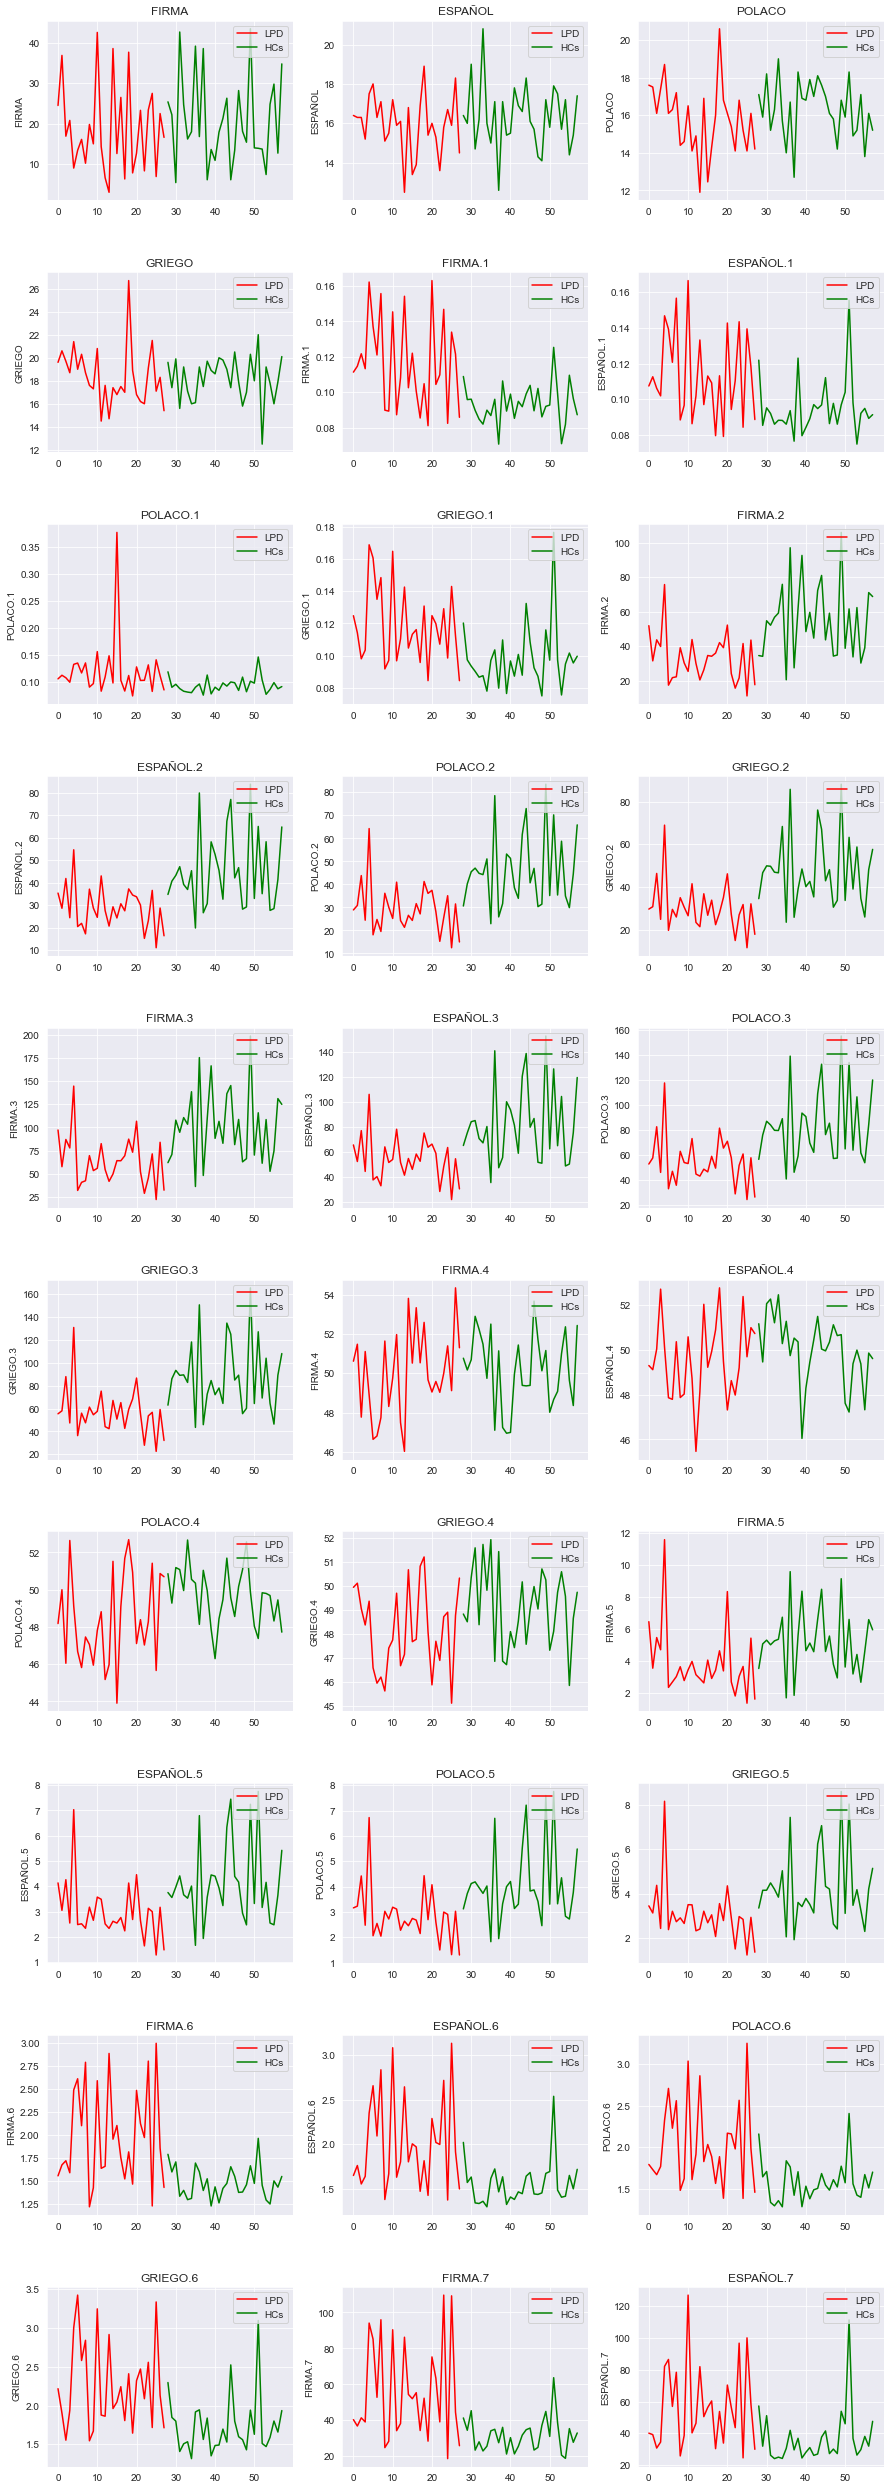

In [8]:
# plots para revisar variables o features extraidas
import warnings
warnings.filterwarnings('ignore')
# separo los 3 grupos para ver si existen ouliers que se relacionan con los grupos
LPD=X_selected.loc[X_selected['y'] == 1]
#RPD=X_selected.loc[X_selected['y'] == 1]
HCs=X_selected.loc[X_selected['y'] == 2]
plt.subplots(figsize=(15,45))
sns.set_style('darkgrid')
plt.subplots_adjust (hspace=0.4, wspace=0.2)
i=0
for col in LPD.columns:
    i+=1
    plt.subplot(10,3,i)
    sns.lineplot(data=LPD[col],color='r',label='LPD')
#    sns.lineplot(data=RPD[col],color='r',label='RPD')
    sns.lineplot(data=HCs[col],color='g',label='HCs')
    plt.legend(loc='upper right')
    plt.title(col)
    if i==30:
        break

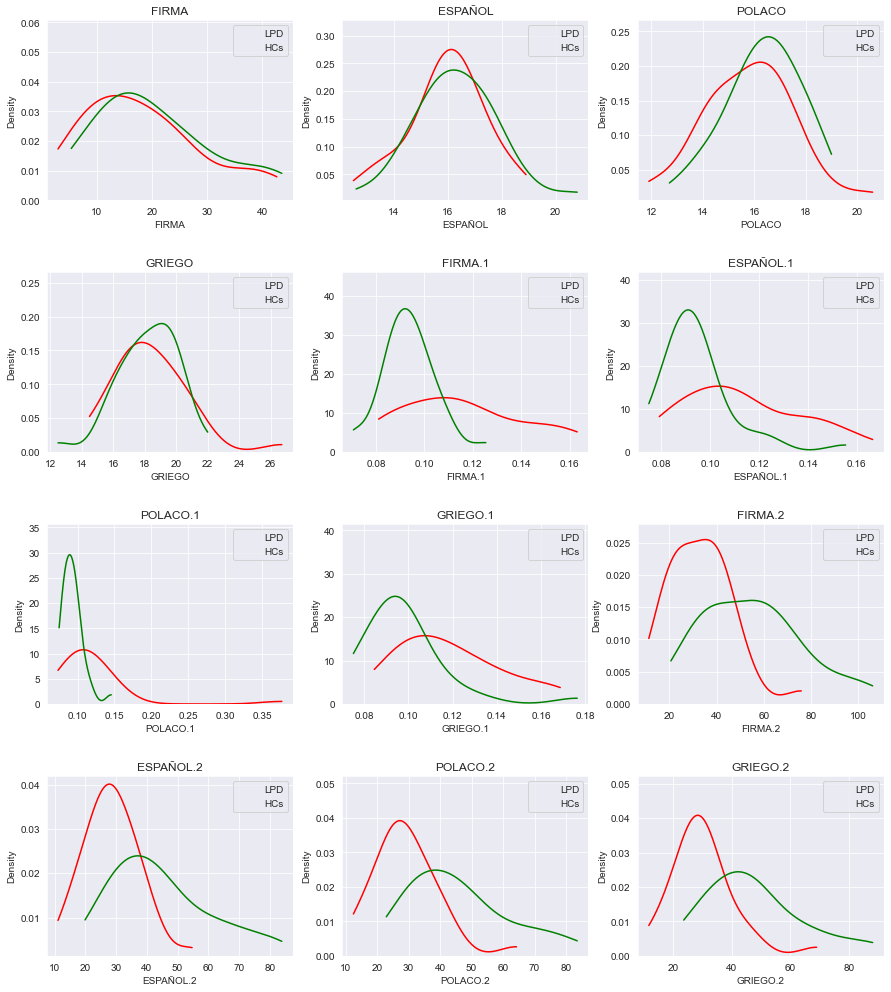

In [10]:
# Plot para analizar la distribución de cada una de las variables.
plt.subplots(figsize=(15,45))
sns.set_style('darkgrid')
plt.subplots_adjust (hspace=0.4, wspace=0.2)
i=0
for col in LPD.columns:
    i+=1
    plt.subplot(10,3,i)
    # first (0th) column of M is diagnosis, non-numerical
    sns.histplot(data=LPD[col],color="r", label="LPD", kde=True, stat="density", linewidth=0, element="poly", fill=False)
#    sns.histplot(data=RPD[col],color="r", label="RPD", kde=True, stat="density", linewidth=0, element="step", fill=False)
    sns.histplot(data=HCs[col],color="g", label="HCs", kde=True, stat="density", linewidth=0, element="step", fill=False)
    plt.legend(loc='upper right')
    plt.title(col)
    if i==12:
        break

In [7]:
# delete the label y
del X['y']
X

FIRMA  ESPAÑOL     POLACO  GRIEGO   FIRMA.1  ESPAÑOL.1  POLACO.1  \
0    24.5     16.4  17.600000    19.6  0.111345   0.107417  0.105161   
1    36.9     16.3  17.500000    20.6  0.114699   0.112580  0.111857   
2    16.9     16.3  16.100000    19.7  0.121732   0.106123  0.107220   
3    20.8     15.2  17.400000    18.7  0.113289   0.101889  0.098939   
4     9.0     17.5  18.700000    21.4  0.162326   0.146722  0.132083   
5    13.4     18.0  16.100000    19.0  0.137197   0.139267  0.134482   
6    16.1     16.3  16.300000    20.3  0.121055   0.120693  0.116152   
7    10.2     17.1  17.200000    18.7  0.155789   0.156593  0.134700   
8    19.8     15.1  14.400000    17.6  0.089823   0.088401  0.089851   
9    15.0     15.5  14.600000    17.3  0.089283   0.096631  0.096339   
10   42.6     17.2  16.500000    20.8  0.145449   0.166442  0.155686   
11   14.3     15.9  14.100000    14.5  0.087228   0.086280  0.082337   
12    6.6     16.1  14.900000    17.6  0.108232   0.101818  0.108645   
13    3.0     12.5  11.900000    14.7  0.154271   0.133177  0.147955   
14   38.6     16.8  16.900000    17.4  0.102513   0.096990  0.097534   
15   12.6     13.4  12.454545    16.8  0.122062   0.113003  0.376798   
16   26.5     13.9  14.300000    17.5  0.100533   0.109146  0.102553   
17    6.3     16.9  16.000000    17.0  0.085396   0.079600  0.082582   
18   37.7     18.9  20.600000    26.7  0.104787   0.113134  0.111378   
19    7.8     15.4  16.800000    18.9  0.081038   0.079134  0.073515   
20   12.7     16.0  16.100000    16.8  0.163141   0.142673  0.127353   
21   23.3     15.3  15.400000    16.2  0.104398   0.094282  0.102247   
22    8.3     13.6  14.100000    16.0  0.109803   0.110399  0.102473   
23   23.4     15.8  16.800000    19.1  0.146881   0.143391  0.131070   
24   27.5     16.7  15.200000    21.5  0.082372   0.084325  0.081875   
25    6.9     15.9  14.100000    17.1  0.133987   0.139394  0.140496   
26   22.5     18.3  16.100000    18.3  0.121564   0.118178  0.110969   
27   16.6     14.5  14.200000    15.4  0.085790   0.088619  0.084623   
28   25.4     16.4  17.100000    19.6  0.108883   0.121874  0.118214   
29   22.2     16.0  15.900000    17.4  0.095805   0.085368  0.089510   
30    5.4     19.0  18.200000    19.9  0.096043   0.095185  0.095094   
31   42.7     14.7  15.200000    15.6  0.089720   0.092022  0.087143   
32   24.7     16.2  16.300000    19.2  0.084755   0.086007  0.082206   
33   16.2     20.8  19.000000    17.1  0.081922   0.088233  0.080630   
34   18.0     16.0  15.700000    16.0  0.089825   0.088133  0.079560   
35   39.2     15.0  14.000000    16.1  0.086789   0.086023  0.089615   
36   16.8     17.1  16.700000    19.2  0.095978   0.093610  0.095581   
37   38.6     12.6  12.700000    17.5  0.070617   0.076512  0.074996   
38    6.1     17.1  18.300000    19.7  0.106351   0.123024  0.112275   
39   13.6     15.4  16.900000    18.9  0.089300   0.079573  0.077262   
40   10.9     15.5  16.800000    18.6  0.098897   0.084187  0.089715   
41   17.9     17.8  17.900000    20.0  0.085201   0.089101  0.083969   
42   21.3     16.9  17.000000    19.8  0.094807   0.096988  0.097636   
43   26.3     16.6  18.100000    19.0  0.091783   0.094759  0.091719   
44    6.1     18.3  17.600000    17.4  0.099037   0.096807  0.099411   
45   13.4     16.1  17.000000    20.5  0.103858   0.112082  0.097947   
46   28.2     15.7  16.100000    17.9  0.089456   0.086343  0.083720   
47   18.1     14.3  15.800000    15.8  0.102129   0.097686  0.108431   
48   15.4     14.1  14.200000    17.0  0.086016   0.086041  0.081277   
49   43.5     17.2  16.800000    20.3  0.091983   0.096861  0.100779   
50   14.0     15.8  15.900000    18.0  0.092708   0.103943  0.097219   
51   13.9     17.9  18.300000    22.0  0.125355   0.155393  0.145674   
52   13.7     17.5  14.900000    12.5  0.099104   0.097999  0.102879   
53    7.4     15.7  15.200000    19.2  0.070861   0.074865  0.076514   
54   24.8     17.2  17.100000    17.8  0.081

In [51]:
# normalize all data along columns
#test without normalize
scaler = StandardScaler() 
X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)
X

FIRMA   ESPAÑOL    POLACO    GRIEGO   FIRMA.1  ESPAÑOL.1  POLACO.1  \
0   0.324878  1.008346  0.431520  2.400111  0.351813  -0.492126 -0.328629   
1  -0.996937 -1.061617 -1.430144 -0.396225  0.103529  -0.078910 -0.526902   
2   0.386358  2.108014  1.229377  1.397651  1.645864   2.251251  2.920688   
3  -1.089157 -0.220695 -0.233360 -1.082119  2.953177   1.957184  1.108479   
4  -0.166960  0.038051  0.165568  0.025863 -0.846859  -0.852971 -0.736124   
5  -0.740771 -1.126303 -1.829073 -1.293163 -1.152597  -1.175413 -0.769879   
6   0.939676 -2.614089 -0.499312 -0.660031 -2.010966  -1.334792 -1.283280   
7  -0.474359 -0.932244 -1.097704 -0.923836 -1.019647  -1.136226 -0.942045   
8  -1.181376  0.232110 -0.033896 -0.871075 -0.922368  -0.852127 -0.742903   
9  -0.341153 -0.802872 -0.366336 -0.554508  0.452781  -0.883793 -0.874897   
10 -0.494852  0.943660  0.630984  0.131385  0.803660   0.469134  0.759116   
11  1.708174 -0.220695  0.498008  0.553474  1.441504   1.676882  1.610213   
12 -1.232609 -0.608813  0.099080  0.870040 -0.776884  -0.652562 -0.882273   
13  0.806470  0.361482  1.694793  1.133846  1.507786   2.083483  2.541975   
14  0.048219 -0.608813 -0.698776  0.289669  1.395621  -0.014624  0.111528   
15 -1.335076  0.038051 -0.499312 -1.240402  1.422360   1.469207  1.402474   
16  0.796224  0.296796  0.165568  1.555934  1.766915   1.459739  0.744796   
17 -0.341153 -0.479440 -0.366336 -0.554508 -0.374643  -1.079926 -1.103805   
18 -0.576825 -0.414754 -2.759905 -0.712792 -0.167877  -0.116766 -0.290464   
19 -0.658798  0.167423  0.763960  0.606235 -0.496950  -0.313997 -1.025108   
20 -0.218193  0.102737  0.630984  0.131385 -0.681990  -0.115906 -0.060732   
21  0.642524  0.167423  0.630984  0.711757  0.869139   1.379691  1.388368   
22  0.314632 -0.091322 -0.166872 -0.448986 -0.017262  -0.612523 -0.276768   
23 -1.406802  1.849268  1.362353  0.870040 -0.001121  -0.076797  0.047189   
24  2.415191 -0.932244 -0.632288 -1.398685 -0.429672  -0.249394 -0.414085   
25  0.570798  0.038051  0.099080  0.500713 -0.766185  -0.577657 -0.700450   
26 -0.300166  3.013622  1.894257 -0.607269 -0.958171  -0.456157 -0.791889   
27 -0.115727 -0.091322 -0.299848 -1.187641 -0.422504  -0.461641 -0.853946   
28  2.056559 -0.738185 -1.430144 -1.134880 -0.628313  -0.576796 -0.270675   
29 -0.238686  0.620228  0.365032  0.500713 -0.005512  -0.162747  0.075401   
30  1.995079 -2.290657 -2.294489 -0.396225 -1.724413  -1.095828 -1.118705   
31 -1.335076  0.620228  1.428841  0.764518  0.697536   1.442490  1.043793   
32 -0.566578 -0.479440  0.498008  0.342430 -0.458125  -0.928771 -0.987287   
33 -0.843237 -0.414754  0.431520  0.184146  0.192326  -0.676992 -0.264889   
34 -0.125973  1.073032  1.162889  0.922801 -0.735928  -0.408803 -0.598210   
35  0.222412  0.490855  0.564496  0.817279 -0.084851   0.021608  0.194635   
36  0.734744  0.296796  1.295865  0.395191 -0.289853  -0.100016 -0.148608   
37 -1.335076  1.396464  0.963425 -0.448986  0.201847   0.011709  0.297584   
38 -0.587072 -0.026636  0.564496  1.186607  0.528544   0.845320  0.212640   
39  0.929430 -0.285381 -0.033896 -0.185181 -0.447572  -0.559332 -0.612613   
40 -0.105480 -1.190990 -0.233360 -1.293163  0.411366   0.059727  0.820841   
41 -0.382139 -1.320362 -1.297168 -0.660031 -0.680712  -0.575811 -0.754378   
42  2.497164  0.684914  0.431520  1.081084 -0.276296   0.014653  0.376930   
43 -0.525592 -0.220695 -0.166872 -0.132420 -0.227115   0.401188  0.170414   
44 -0.535839  1.137719  1.428841  1.978023  1.985597   3.208912  2.981284   
45 -0.556332  0.878973 -0.831752 -3.034278  0.206354   0.076787  0.498753   
46 -1.201870 -0.285381 -0.632288  0.500713 -1.707852  -1.185678 -1.030674   
47  0.581044  0.684914  0.630984 -0.237942 -0.966765  -0.244732 -0.506801   
48  1.093376 -1.126303 -1.563120 -1.187641  0.917009  -0.094326  0.225936   
49 -0.658798 -0.479440 -0.033896 -0.185181  0.023054  -0.399686 -0.437974   
50  1.605707  0.814287 -0.632288  0.975562 -0.598775  -0.285138 -0.198044   

  

[0.01119547 0.00719363 0.00955053 0.00805328 0.02559522 0.01653453
 0.01176449 0.02230624 0.02778594 0.01485689 0.01840659 0.01798287
 0.02091271 0.02024006 0.01428102 0.01424878 0.00721816 0.00839768
 0.01575177 0.0121284  0.01270261 0.01330603 0.01624422 0.01793024
 0.0488875  0.02390265 0.0206557  0.02695772 0.03826138 0.01283319
 0.02052652 0.02149587 0.0143407  0.02763949 0.0529302  0.01514253
 0.02039536 0.01405126 0.01165411 0.01599965 0.00787877 0.00793786
 0.00755622 0.01450049 0.00825037 0.00605166 0.01995411 0.011689
 0.02126086 0.01619034 0.01786399 0.01169213 0.00570798 0.01556608
 0.01320871 0.00781821 0.02124581 0.00916305 0.01085615 0.015347  ]


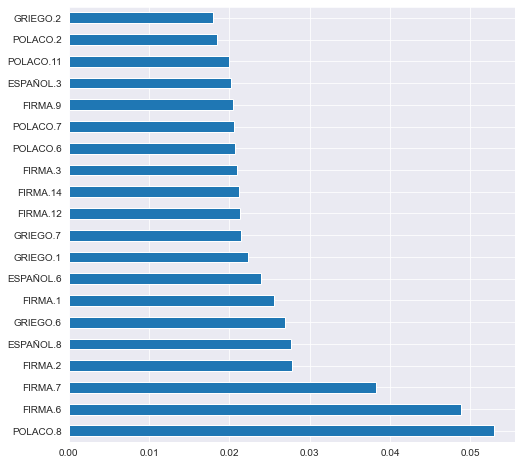

In [13]:
# feature importance based on Tree Based Classifiers
#X = features.iloc[:,0:1578]  #independent columns
#y = features.iloc[:,-1]    #target column i.e group (LPD, RPD and HCs)
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', figsize=(8,8))
plt.show()

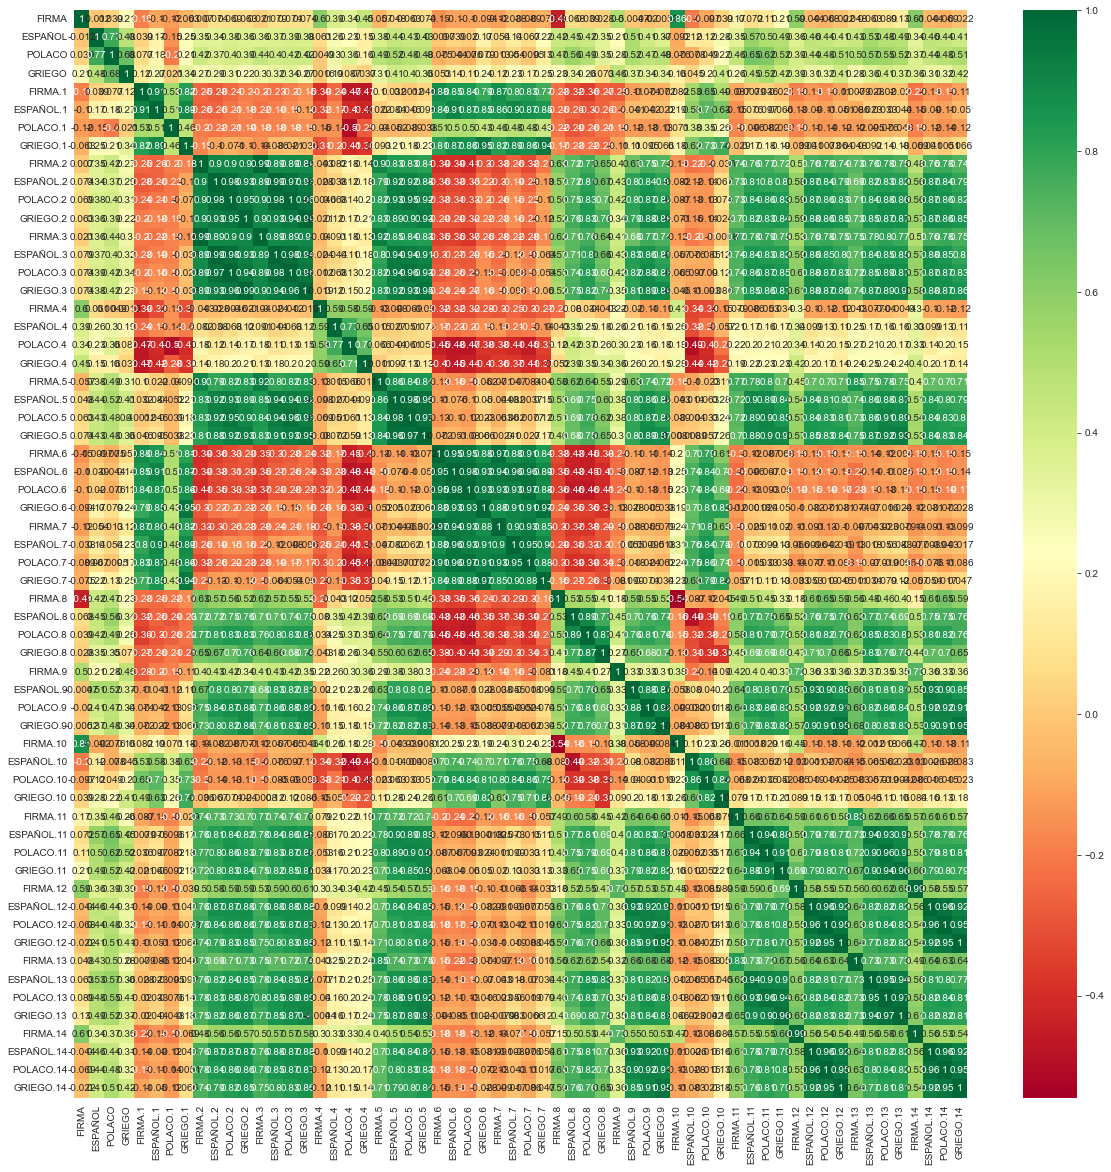

In [14]:
#get correlations of each features in dataset (you can re-run adding or removing higher correlated features)
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
# once data preprocessing, Machine learning

In [8]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm

In [20]:
# split matrix in data for training and testing 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

FIRMA  ESPAÑOL  POLACO  GRIEGO   FIRMA.1  ESPAÑOL.1  POLACO.1  GRIEGO.1  \
36   26.3     16.6    18.1    19.0  0.091783   0.094759  0.091719  0.087962   
33   10.9     15.5    16.8    18.6  0.098897   0.084187  0.089715  0.096764   
19   12.7     16.4    17.3    19.4  0.088727   0.090838  0.076610  0.074187   
48   29.8     14.4    13.8    16.0  0.109589   0.094864  0.098176  0.101688   
15    6.1     16.2    15.4    15.9  0.117045   0.123514  0.118458  0.124856   
9    15.8     14.9    15.6    17.2  0.102740   0.080397  0.079199  0.091321   
16   26.9     16.6    16.4    21.2  0.122129   0.123340  0.107120  0.124060   
26   16.2     20.8    19.0    17.1  0.081922   0.088233  0.080630  0.087637   
44   13.9     17.9    18.3    22.0  0.125355   0.155393  0.145674  0.176419   
25   24.7     16.2    16.3    19.2  0.084755   0.086007  0.082206  0.086733   
11   35.8     15.8    16.9    19.3  0.117328   0.127319  0.122039  0.132819   
0    22.3     17.7    16.8    22.8  0.101250   0.087574  0.088616  0.089738   
45   13.7     17.5    14.9    12.5  0.099104   0.097999  0.102879  0.097397   
27   18.0     16.0    15.7    16.0  0.089825   0.088133  0.079560  0.078089   
34   17.9     17.8    17.9    20.0  0.085201   0.089101  0.083969  0.087379   
5    11.9     14.4    13.4    15.8  0.079053   0.075054  0.081009  0.083987   
29   16.8     17.1    16.7    19.2  0.095978   0.093610  0.095581  0.103633   
37    6.1     18.3    17.6    17.4  0.099037   0.096807  0.099411  0.132399   
1     9.4     14.5    14.0    17.5  0.097587   0.095146  0.085198  0.090825   
21   25.4     16.4    17.1    19.6  0.108883   0.121874  0.118214  0.120272   
2    22.9     19.4    18.0    20.9  0.120343   0.137844  0.144629  0.139185   
39   28.2     15.7    16.1    17.9  0.089456   0.086343  0.083720  0.092552   
35   21.3     16.9    17.0    19.8  0.094807   0.096988  0.097636  0.100819   
23    5.4     19.0    18.2    19.9  0.096043   0.095185  0.095094  0.093584   
41   15.4     14.1    14.2    17.0  0.086016   0.086041  0.081277  0.075118   
10   14.3     17.6    17.1    18.5  0.107917   0.105188  0.107367  0.113288   
22   22.2     16.0    15.9    17.4  0.095805   0.085368  0.089510  0.097469   
18   13.5     15.5    12.0    16.9  0.093582   0.094452  0.089274  0.092366   
50   34.8     17.4    15.2    20.1  0.087225   0.091367  0.090867  0.099699   
20   17.0     16.3    17.1    18.5  0.085997   0.094468  0.093234  0.104381   
7    14.5     14.7    14.5    16.5  0.081015   0.075772  0.078041  0.073348   
42   43.5     17.2    16.8    20.3  0.091983   0.096861  0.100779  0.116013   
14   19.6     15.2    15.1    18.8  0.116651   0.096324  0.096204  0.111953   
28   39.2     15.0    14.0    16.1  0.086789   0.086023  0.089615  0.097128   
38   13.4     16.1    17.0    20.5  0.103858   0.112082  0.097947  0.108505   

       FIRMA.2  ESPAÑOL.2  ...  POLACO.12  GRIEGO.12  FIRMA.13  ESPAÑOL.13  \
36   72.377052  67.336847  ...   169.0440   208.0760    58.422      45.786   
33   48.547103  52.627259  ...    96.5498   114.1776    34.840      29.484   
19   70.011464  50.635667  ...   100.8482    98.6004    79.690      43.914   
48   39.183684  28.528989  ...    71.6470    86.2928    41.626      13.052   
15   14.071680  11.339983  ...    49.4508    62.6022    14.560       9.334   
9    51.249638  43.541489  ...   107.6944   109.8492    41.522      22.126   
16   30.368007  23.912996  ...    50.1998    68.9540    41.730      19.396   
26   59.292099  37.031557  ...   132.6448   143.2714    59.774      31.434   
44   61.716323  65.056981  ...   154.9340   188.1790    29.874      37.466   
25   56.839508  39.259491  ...    77.3339   108.9190    33.410      19.994   
11   37.914228  34.743448  ...    94.5158   106.0493    31.824      20.904   
0    44.571642  35.179835  ...    82.4345    77.9639    29.120      21.996   
45   33.868412  35.154215  ...    82.1430    55.7844    36.660      41.522   
27   75.960768  45.378119  ...   112.0274   135.8508    48.360     

In [21]:
# SVM
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
rbf = svm.SVC(kernel='rbf', gamma=10, C=0.00001).fit(X_train, Y_train)
poly = svm.SVC(kernel='poly', degree=2, C=0.00001).fit(X_train, Y_train)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
poly_accuracy = accuracy_score(Y_test, poly_pred)
poly_f1 = f1_score(Y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  56.25
F1 (Polynomial Kernel):  40.50


In [22]:
# KNN
knn=KNeighborsClassifier(n_neighbors= 20)
scores = np.mean(cross_val_score(knn,  X_train, Y_train, scoring='accuracy'))
#Train the model using the training sets
knn.fit(X_train, Y_train)
#p_scores = np.mean(cross_val_score(knn,  X_train, Y_train, scoring='precision'))
#r_scores = np.mean(cross_val_score(knn,  X_train, Y_train, scoring='recall'))
print("Accuracy: %s" % '{:.2%}'.format(scores))

Accuracy: 80.00%


In [23]:
# Random Forest Classifier
rf=RandomForestClassifier(random_state=21)
score_rf = np.mean(cross_val_score(rf,  X_train, Y_train, scoring='accuracy'))
rf.fit(X_train, Y_train)
p_score_rf = np.mean(cross_val_score(rf,  X_train, Y_train, scoring='precision'))
r_score_rf = np.mean(cross_val_score(rf,  X_train, Y_train, scoring='recall'))
print("Accuracy for RandomForest: %s" % '{:.2%}'.format(score_rf))
print("Precision for RandomForest: %s" % '{:.2%}'.format(p_score_rf))
print("Recall for RandomForest: %s" % '{:.2%}'.format(r_score_rf))

Accuracy for RandomForest: 60.00%
Precision for RandomForest: 50.00%
Recall for RandomForest: 43.33%


In [24]:
# Make predictions for the random forest test set in order to check overfitting.
y_pred_test = rf.predict(X_test)
# View accuracy score
accuracy_score(Y_test, y_pred_test)

0.5

/home/floayza/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


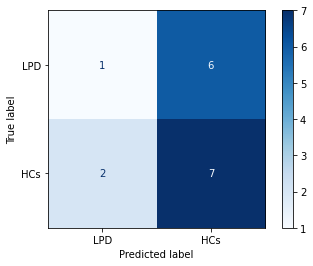

In [26]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
# Predict the labels of the test set samples
predicted_labels = rf.predict(X_test)
# Build the confusion matrix of our 3-class classification problemcnf_matrix = confusion_matrix(y_test, predicted_labels)print(cnf_matrix)
disp = plot_confusion_matrix(rf, X_test, Y_test,
                                 display_labels=['LPD','HCs'],
                                 cmap=plt.cm.Blues)
plt.show()

In [113]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 34 to 51
Data columns (total 60 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FIRMA       55 non-null     float64
 1   ESPAÑOL     55 non-null     float64
 2   POLACO      55 non-null     float64
 3   GRIEGO      55 non-null     float64
 4   FIRMA.1     55 non-null     float64
 5   ESPAÑOL.1   55 non-null     float64
 6   POLACO.1    55 non-null     float64
 7   GRIEGO.1    55 non-null     float64
 8   FIRMA.2     55 non-null     float64
 9   ESPAÑOL.2   55 non-null     float64
 10  POLACO.2    55 non-null     float64
 11  GRIEGO.2    55 non-null     float64
 12  FIRMA.3     55 non-null     float64
 13  ESPAÑOL.3   55 non-null     float64
 14  POLACO.3    55 non-null     float64
 15  GRIEGO.3    55 non-null     float64
 16  FIRMA.4     55 non-null     float64
 17  ESPAÑOL.4   55 non-null     float64
 18  POLACO.4    55 non-null     float64
 19  GRIEGO.4    55 non-null     fl

In [35]:
# Import dependencies
import plotly
import plotly.graph_objs as go

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

# Configure the trace.
trace = go.Scatter3d(
    x=X_train['FIRMA.6'],  # <-- Put your data instead
    y=X_train['POLACO.8'],  # <-- Put your data instead
    z=X_train['FIRMA.7'],  # <-- Put your data instead
    mode='markers',
    marker={
        'size': 1,
        'opacity': 0.8,
        'color': Y_train
    }
)

# Configure the layout.
layout = go.Layout(margin={'l': 0, 'r': 0, 'b': 0, 't': 0})

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

# Render the plot.
plotly.offline.iplot(plot_figure)